In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Animation
from matplotlib import animation, rc
rc('animation', html='html5')

Text(0,0.5,'recovery variable, W')

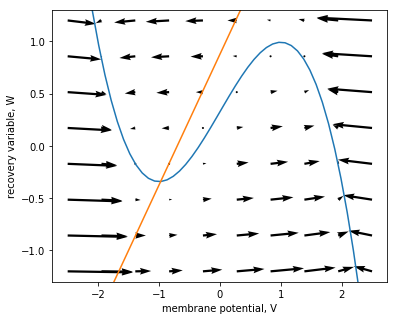

In [2]:
plt.figure(figsize=(6, 5))
v, w = np.meshgrid(np.linspace(-2.5, 2.5, 10), np.linspace(-1.2, 1.2, 8))
vd = v-v*v*v/3-w+0.325
wd = 0.08*(v+0.7-0.8*w)
plt.quiver(v, w, vd, wd)
plt.ylim([-1.3, 1.3])

x = np.linspace(-2.5, 2.5)
plt.plot(x, x-x*x*x/3+0.325)
plt.plot(x, (x+0.7)/0.8)
plt.xlabel("membrane potential, V")
plt.ylabel("recovery variable, W")

(-0.5, 1.4)

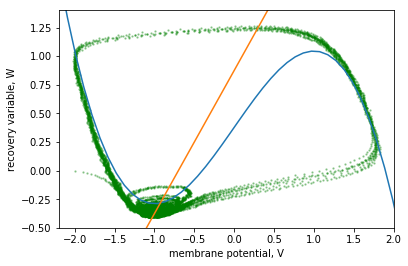

In [3]:
vd = lambda v, w: v-v*v*v/3-w
wd = lambda v, w: 0.08*(v+0.7-0.8*w)

u = np.array([-2., -0.])
dt = 0.1

# I_threshold = 0.325
#I = lambda: 0.32
I = lambda: 0.31 + 0.1 * np.random.randn()

x = np.linspace(-2.5, 2.5)
plt.plot(x, x-x*x*x/3+I())
plt.plot(x, (x+0.7)/0.8)
plt.xlabel("membrane potential, V")
plt.ylabel("recovery variable, W")

result = [u.copy()]
for _ in range(10000):
    u += dt * np.asarray([vd(*u)+I(), wd(*u)])
    result.append(u.copy())

result = np.asarray(result)
plt.scatter(*result.T, s=2., alpha=0.3, c='g')
plt.xlim([-2.2, 2])
plt.ylim([-0.5, 1.4])

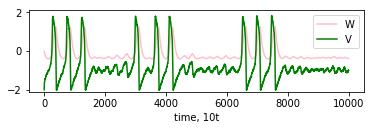

In [4]:
plt.figure(figsize=(6, 1.5))
plt.plot(result.T[1], 'pink')
plt.plot(result.T[0], 'g')
plt.ylim([-2.1, 2.1])
plt.xlabel("time, 10t")
plt.legend(["W", "V"], loc='upper right')

(-0.5, 2.5)

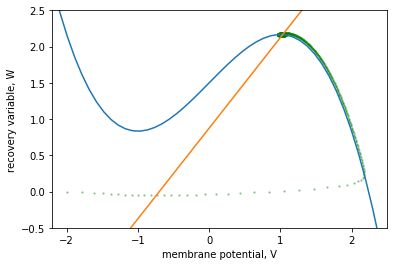

In [5]:
vd = lambda v, w: v-v*v*v/3-w
wd = lambda v, w: 0.08*(v+0.7-0.8*w)

u = np.array([-2., -0.])
dt = 0.1

# I_threshold = 0.325
I = lambda: 1.5
#I = lambda: 0.3 + 0.1 * np.random.randn()

x = np.linspace(-2.5, 2.5)
plt.plot(x, x-x*x*x/3+I())
plt.plot(x, (x+0.7)/0.8)
plt.xlabel("membrane potential, V")
plt.ylabel("recovery variable, W")

result = [u.copy()]
for _ in range(10000):
    u += dt * np.asarray([vd(*u)+I(), wd(*u)])
    result.append(u.copy())

result = np.asarray(result)
plt.scatter(*result.T, s=2., alpha=0.3, c='g')
plt.xlim([-2.2, 2.5])
plt.ylim([-0.5, 2.5])

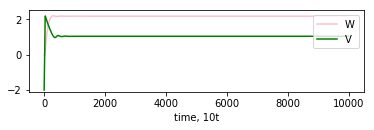

In [6]:
plt.figure(figsize=(6, 1.5))
plt.plot(result.T[1], 'pink')
plt.plot(result.T[0], 'g')
plt.ylim([-2.1, 2.5])
plt.xlabel("time, 10t")
plt.legend(["W", "V"], loc='upper right')

In [7]:
# I_threshold = 0.325
I = lambda: 0.2

vd = lambda v, w: v-v*v*v/3-w
wd = lambda v, w: 0.08*(v+0.7-0.8*w)

num_x = 1000
x, dx = np.linspace(0, 2, num_x, endpoint=False, retstep=True)

v = -1.0 * np.ones_like(x)
w = -0.5 * np.ones_like(x)

dt = 0.3
result_v = [v.copy()]
result_w = [w.copy()]

sigma = 0.03
m = int(1 + 2 * sigma/dx)
xk = np.arange(-m, m+1, 1) * dx / sigma
kernel = np.exp(-xk*xk)
kernel /= kernel.sum()

for frame in range(60):
    for _ in range(5):
        vp = np.pad(v, (m, m), 'constant', constant_values=(0.5, -1.0))
        v = np.convolve(vp, kernel, 'valid')
        v_ = v + dt * (vd(v, w) + I())
        w_ = w + dt * (wd(v, w))
        v, w = (v_, w_)
    result_v.append(v.copy())
    result_w.append(w.copy())

fig, ax = plt.subplots(figsize=(6, 3))
ax.set_ylim([-2, 2])
ax.set_xlim([0, 2])
lv, lw = ax.plot([], [], [], [], animated=True)
ax.legend(['v', 'w'], loc='lower right')

def update(frame):
    lv.set_data(x, result_v[frame])
    lw.set_data(x, result_w[frame])
    return (lv, lw)

anim = animation.FuncAnimation(fig, update, frames=len(result_v), interval=100)
plt.close()

anim

In [8]:
anim.save("fitz-wave.gif", writer=animation.ImageMagickWriter(fps=10))

In [ ]:
# I_threshold = 0.325
I = lambda: 0.36

vd = lambda v, w: v-v*v*v/3-w
wd = lambda v, w: 0.08*(v+0.7-0.8*w)

num_x = 1000
x, dx = np.linspace(0, 2, num_x, endpoint=False, retstep=True)

v = np.cos(np.pi*x)
w = -0.5 * np.ones_like(x)

dt = 0.1
result_v = [v.copy()]
result_w = [w.copy()]

def gen_kernel(sigma=0.03):
    m = int(1 + 2 * sigma/dx)
    xk = np.arange(-m, m+1, 1) * dx / sigma
    kernel = np.exp(-xk*xk)
    kernel /= kernel.sum()
    return kernel

def defuse(u, kernel, pad_val=(0., 0.)):
    m = int(len(kernel)/2)
    up = np.pad(u, (len(kernel)-m-1, m), 'constant', constant_values=pad_val)
    return np.convolve(up, kernel, 'valid')

kernel_v = gen_kernel(0.005)
kernel_w = gen_kernel(0.02)

for frame in range(100):
    for _ in range(15):
        v = defuse(v, kernel_v, (1.5, -1.0))
        w = defuse(w, kernel_w, (-0.5, 1.0))
        v_ = v + dt * (vd(v, w) + I())
        w_ = w + dt * (wd(v, w))
        v, w = (v_, w_)
    result_v.append(v.copy())
    result_w.append(w.copy())

fig, ax = plt.subplots(figsize=(6, 3))
ax.set_ylim([-2, 2])
ax.set_xlim([0, 2])
lv, lw = ax.plot([], [], [], [], animated=True)
ax.legend(['v', 'w'], loc='lower right')

def update(frame):
    lv.set_data(x, result_v[frame])
    lw.set_data(x, result_w[frame])
    return (lv, lw)

anim = animation.FuncAnimation(fig, update, frames=len(result_v), interval=100)
plt.close()

anim

In [ ]:
anim.save("fitz-patt.gif", writer=animation.ImageMagickWriter(fps=10))